In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

csv_git_url = 'https://raw.githubusercontent.com/PaixaoThales/copa-do-mundo-2022-VIS/main/VIS_Pr04_worldcup_matches.csv'

data = pd.read_csv(csv_git_url, sep=",", encoding = "UTF-8")

def normalizePercentage(value: float):
  if(value > 1):
    return value * 0.001
  return value

def inverseProbabilite(value: float):
  return (1 - value) * 100;

data['prob1'] = data['prob1'].apply(lambda value: normalizePercentage(value))
data['prob2'] = data['prob2'].apply(lambda value: normalizePercentage(value))
data['probtie'] = data['probtie'].apply(lambda value: normalizePercentage(value))

data['prob-lose-team1'] = data['prob1'].apply(lambda value: inverseProbabilite(value))
data['prob-lose-team2'] = data['prob2'].apply(lambda value: inverseProbabilite(value))

data

,date,team1,team2,spi1,spi2,prob1,prob2,probtie,score1,score2,prob-lose-team1,prob-lose-team2
0,2022-11-20,Qatar,Ecuador,51.00,72.74,0.2369,0.5045,0.2586,0,2,76.31,49.55
1,2022-11-21,England,Iran,85.96,62.17,0.6274,0.1187,0.2539,6,2,37.26,88.13
2,2022-11-21,Senegal,Netherlands,73.84,86.01,0.2235,0.5053,0.2712,0,2,77.65,49.47
3,2022-11-21,USA,Wales,74.83,65.58,0.4489,0.2591,0.2920,1,1,55.11,74.09
4,2022-11-22,Argentina,Saudi Arabia,87.21,56.87,0.7228,0.0807,0.1966,1,2,27.72,91.93
...,...,...,...,...,...,...,...,...,...,...,...,...
59,2022-12-10,England,France,87.59,87.53,0.5160,0.4840,0.0000,1,2,48.40,51.60
60,2022-12-13,Argentina,Croatia,87.46,79.37,0.6426,0.3574,0.0000,3,0,35.74,64.26
61,2022-12-14,France,Morocco,87.72,75.13,0.6646,0.3354,0.0000,2,0,33.54,66.46
62,2022-12-17,Croatia,Morocco,77.65,73.92,0.5325,0.4675,0.0000,2,1,46.75,53.25


In [ ]:
import itertools

toList = lambda dataFrame: list(itertools.chain.from_iterable(dataFrame.values))

teams = toList(data.filter(items=["team2"]).drop_duplicates())

def question1_data(data, team):
  lose_prob_where_team_is_first = (data[data["team1"] == team])["prob-lose-team1"]
  lose_prob_where_team_is_second = (data[data["team2"] == team])["prob-lose-team2"]
  probs_to_lose = list(lose_prob_where_team_is_first.values) + list(lose_prob_where_team_is_second.values)

  min_lose_prob = min(probs_to_lose)
  max_lose_prob = max(probs_to_lose)
  avg_lose_prob = sum(probs_to_lose) / len(probs_to_lose)
  return {'team': team, 'min': min_lose_prob, 'max': max_lose_prob, 'avg': avg_lose_prob}

x = list()
for team in teams:
  x.append(question1_data(data,team))

question1A = pd.DataFrame(x)
question1A

,team,min,max,avg
0,Ecuador,49.55,77.52,63.463333
1,Iran,69.18,88.13,75.873333
2,Netherlands,22.32,57.62,42.882000
3,Wales,61.25,85.63,73.656667
4,Saudi Arabia,70.89,91.93,79.916667
5,Tunisia,61.17,88.84,76.490000
6,Poland,59.39,84.53,74.307500
7,Australia,71.06,89.91,80.932500
8,Croatia,45.40,77.36,59.327143
9,Japan,40.45,86.09,65.935000


<Axes: xlabel='team'>

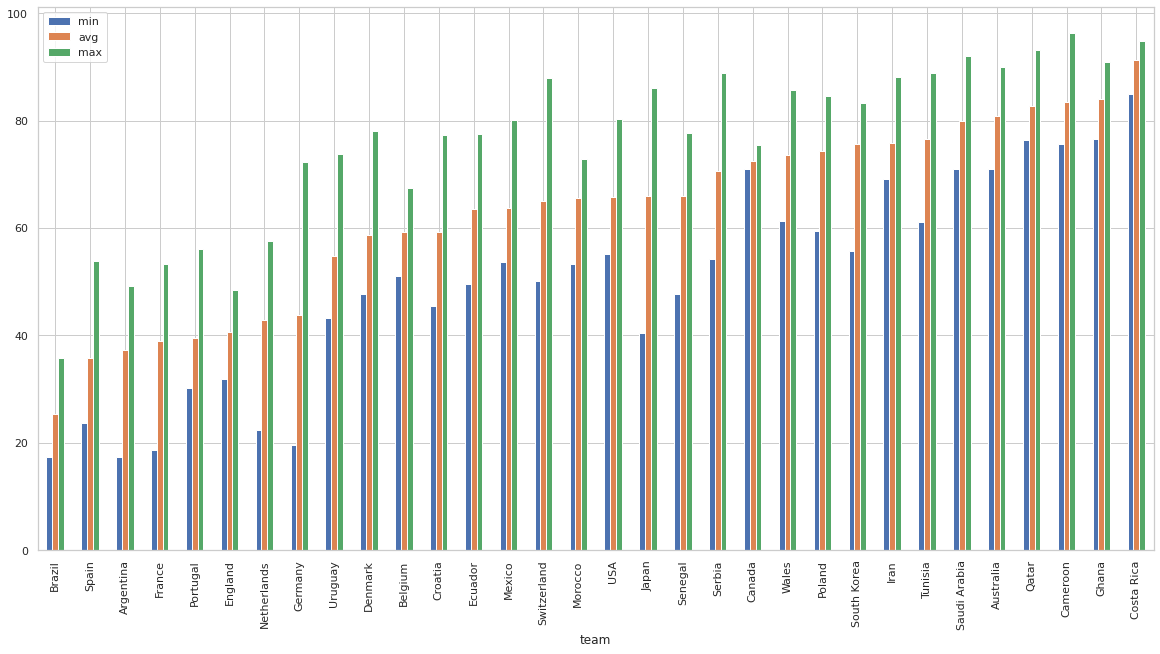

In [ ]:
question1A.sort_values(by='avg').plot(x="team", y=["min","avg", "max"], kind="bar", figsize=(20, 10))

TOP 4 

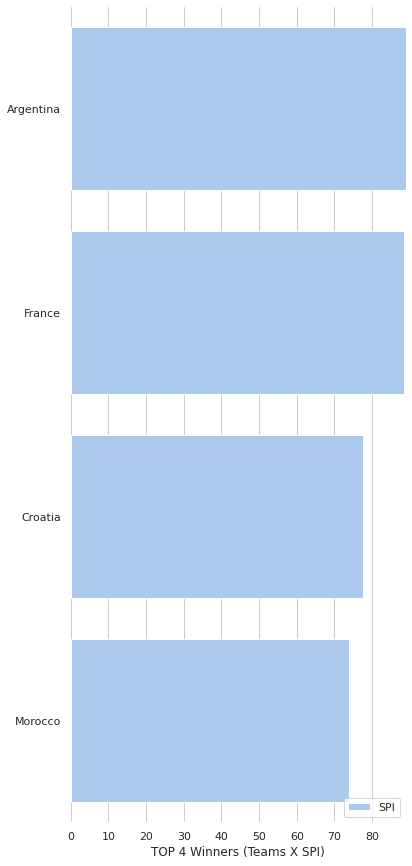

In [ ]:
import time
import datetime

data["timestamp"] = data["date"].apply(lambda date: time.mktime(datetime.datetime.strptime(date, "%Y-%m-%d").timetuple()))
data = data.sort_values(by=["timestamp"], ascending=False)
final_games = data.iloc[0:2]

x = list()
for game in final_games.values:
  x.append((game[1], game[3]))
  x.append((game[2], game[4]))

question1B = pd.DataFrame(x)
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(x=1, y=0, data=question1B,label="SPI", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, question1B[1].max()), ylabel="",xlabel="TOP 4 Winners (Teams X SPI)")
sns.despine(left=True, bottom=True)

In [156]:
url = 'https://raw.githubusercontent.com/PaixaoThales/copa-do-mundo-2022-VIS/main/School_Learning_Modalities__2021-2022.csv'

data = pd.read_csv(url, sep=",", encoding = "UTF-8")
groupped = data.groupby(["State", "City", "District Name", "ZIP Code", "Week"]).agg(last_update=("Week", "max"), student_count=("Student Count", "sum"))

data = groupped.reset_index()
data = data[data["Week"] == data["last_update"]]

data.groupby(["State"]).agg({"student_count": "sum"})

,student_count
State,
AK,9136136.0
AL,50452039.0
AR,33940904.0
AZ,78804738.0
BI,625061.0
CA,418714887.0
CO,64861761.0
CT,34192403.0
DC,6410015.0
